In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv("cleaned_data.csv")

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
my_lr = LogisticRegression()
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [9]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
my_lr.fit(X, y)  # now a trained model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [12]:
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
# Train test split on EDUCATION column

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [17]:
# check fraction of positive class for train and test set
print(np.mean(y_train))
print(np.mean(y_test))

0.223102526838873
0.21657603600225014


In [18]:
# Implement the same process on LIMIT_BAL column 

In [19]:
X_limit_bal = df['LIMIT_BAL'][0:10].values.reshape(-1,1)
X_limit_bal

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [20]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
new_X_limit_bal = df['LIMIT_BAL'][10:20].values.reshape(-1,1)
my_lr.predict(new_X_limit_bal)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [23]:
# Train test split on LIMIT_BAL column

In [24]:
X_limitbal_train, X_limitbal_test, y_limitbal_train, y_limitbal_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [25]:
print(X_limitbal_train.shape)
print(X_limitbal_test.shape)
print(y_limitbal_train.shape)
print(y_limitbal_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
# check fraction of positive class for train and test set
print(np.mean(y_limitbal_train))
print(np.mean(y_limitbal_test))

0.223102526838873
0.21657603600225014


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [27]:
# Train Logistic Regression model on EDUCATION column

In [28]:
education_lr = LogisticRegression(C=0.1)
education_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
education_lr.fit(X_train, y_train)
y_pred = education_lr.predict(X_test)

In [30]:
# logical mask for accuracy
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [31]:
# score method of trained model
education_lr.score(X_test, y_test)

0.7834239639977498

In [32]:
# importing metrics library and using accuracy_score method
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7834239639977498

In [33]:
# Train Logistic Regression model on LIMIT_BAL column

In [34]:
limit_bal_lr = LogisticRegression(C=0.1)
limit_bal_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
limit_bal_lr.fit(X_limitbal_train, y_limitbal_train)
y_limitbal_pred = limit_bal_lr.predict(X_limitbal_test)

In [36]:
# logical mask for accuracy
is_correct = y_limitbal_pred == y_limitbal_test
np.mean(is_correct)

0.7834239639977498

In [37]:
P = sum(y_limitbal_test)
print(P)
TP = sum( (y_limitbal_test==1) & (y_limitbal_pred==1) )
print(TP)
TPR = TP/P
print(TPR)
FN = sum( (y_limitbal_test==1) & (y_limitbal_pred==0) )
print(FN)
FNR = FN/P
print(FNR)

1155
0
0.0
1155
1.0


In [38]:
N = sum(y_limitbal_test==0)
print(N)
TN = sum((y_limitbal_test==0) & (y_limitbal_pred==0))
print(TN)
FP = sum((y_limitbal_test==0) & (y_limitbal_pred==1))
print(FP)
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

4178
4178
0
The true negative rate is 1.0 and the false positive rate is 0.0


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_limitbal_test, y_limitbal_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [40]:
y_pred_proba = limit_bal_lr.predict_proba(X_limitbal_test)
y_pred_proba

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

In [41]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
prob_sum.shape

(5333,)

In [43]:
np.unique(prob_sum)  # to check all values are 1 or not 

array([1.])

In [44]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

(array([280., 509., 414., 538., 587., 610., 412., 491., 782., 710.]),
 array([0.00644174, 0.05409603, 0.10175032, 0.14940461, 0.1970589 ,
        0.24471319, 0.29236748, 0.34002177, 0.38767606, 0.43533034,
        0.48298463]),
 <a list of 10 Patch objects>)

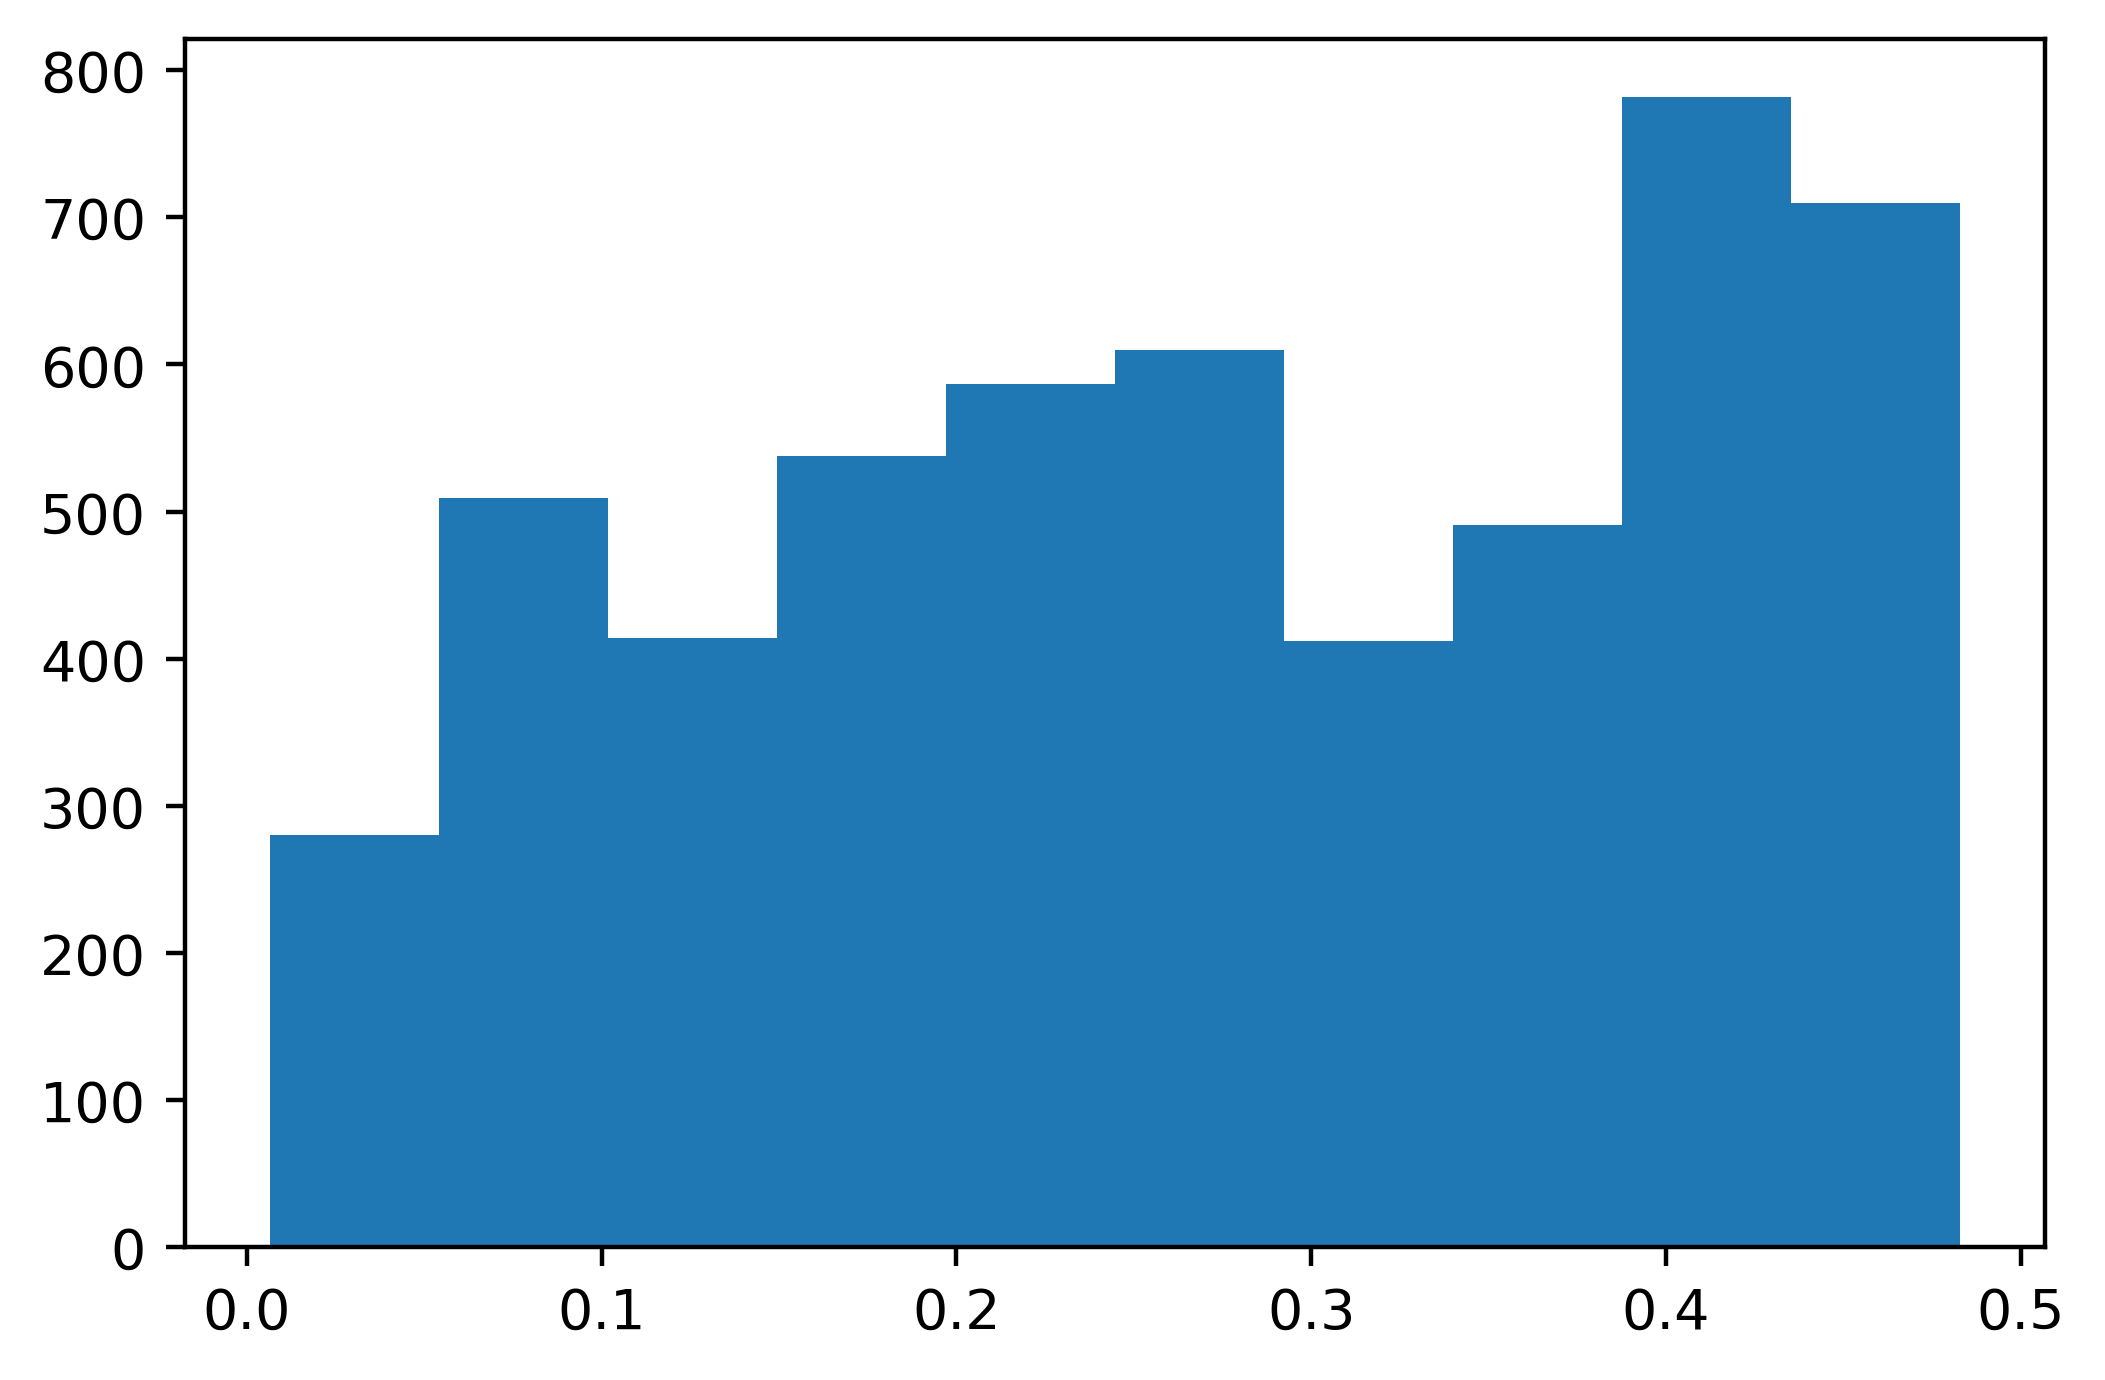

In [45]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

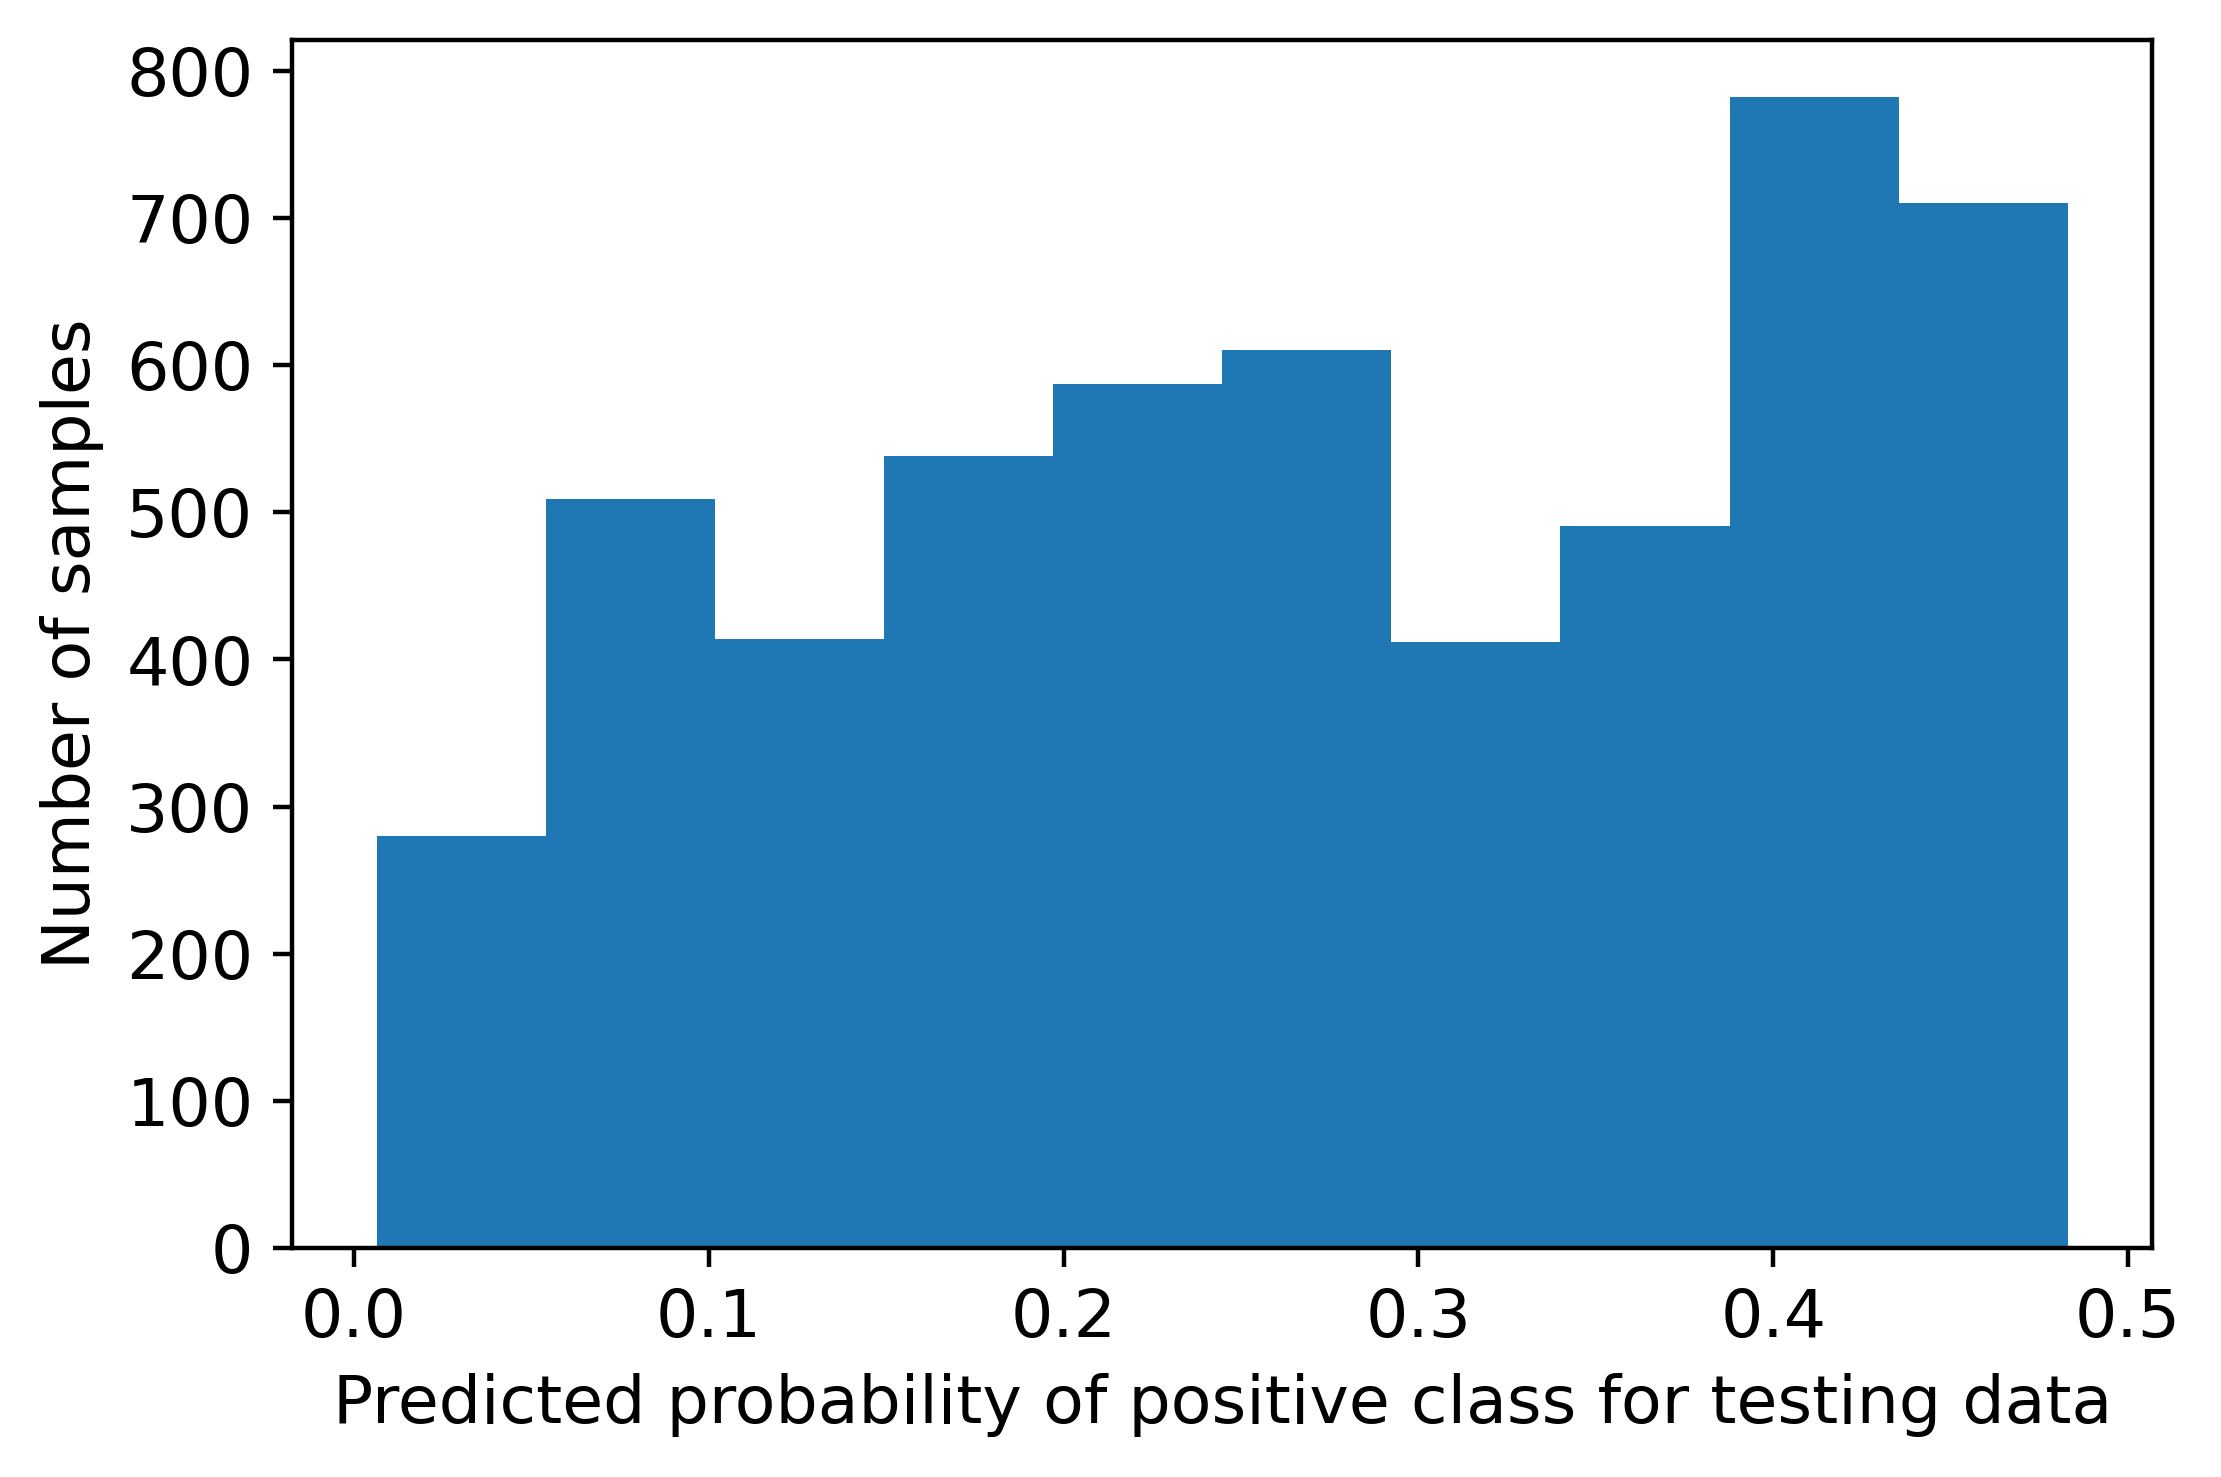

In [46]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [47]:
pos_sample_pos_proba = pos_proba[y_limitbal_test==1]
neg_sample_pos_proba = pos_proba[y_limitbal_test==0]

Text(0, 0.5, 'Number of samples')

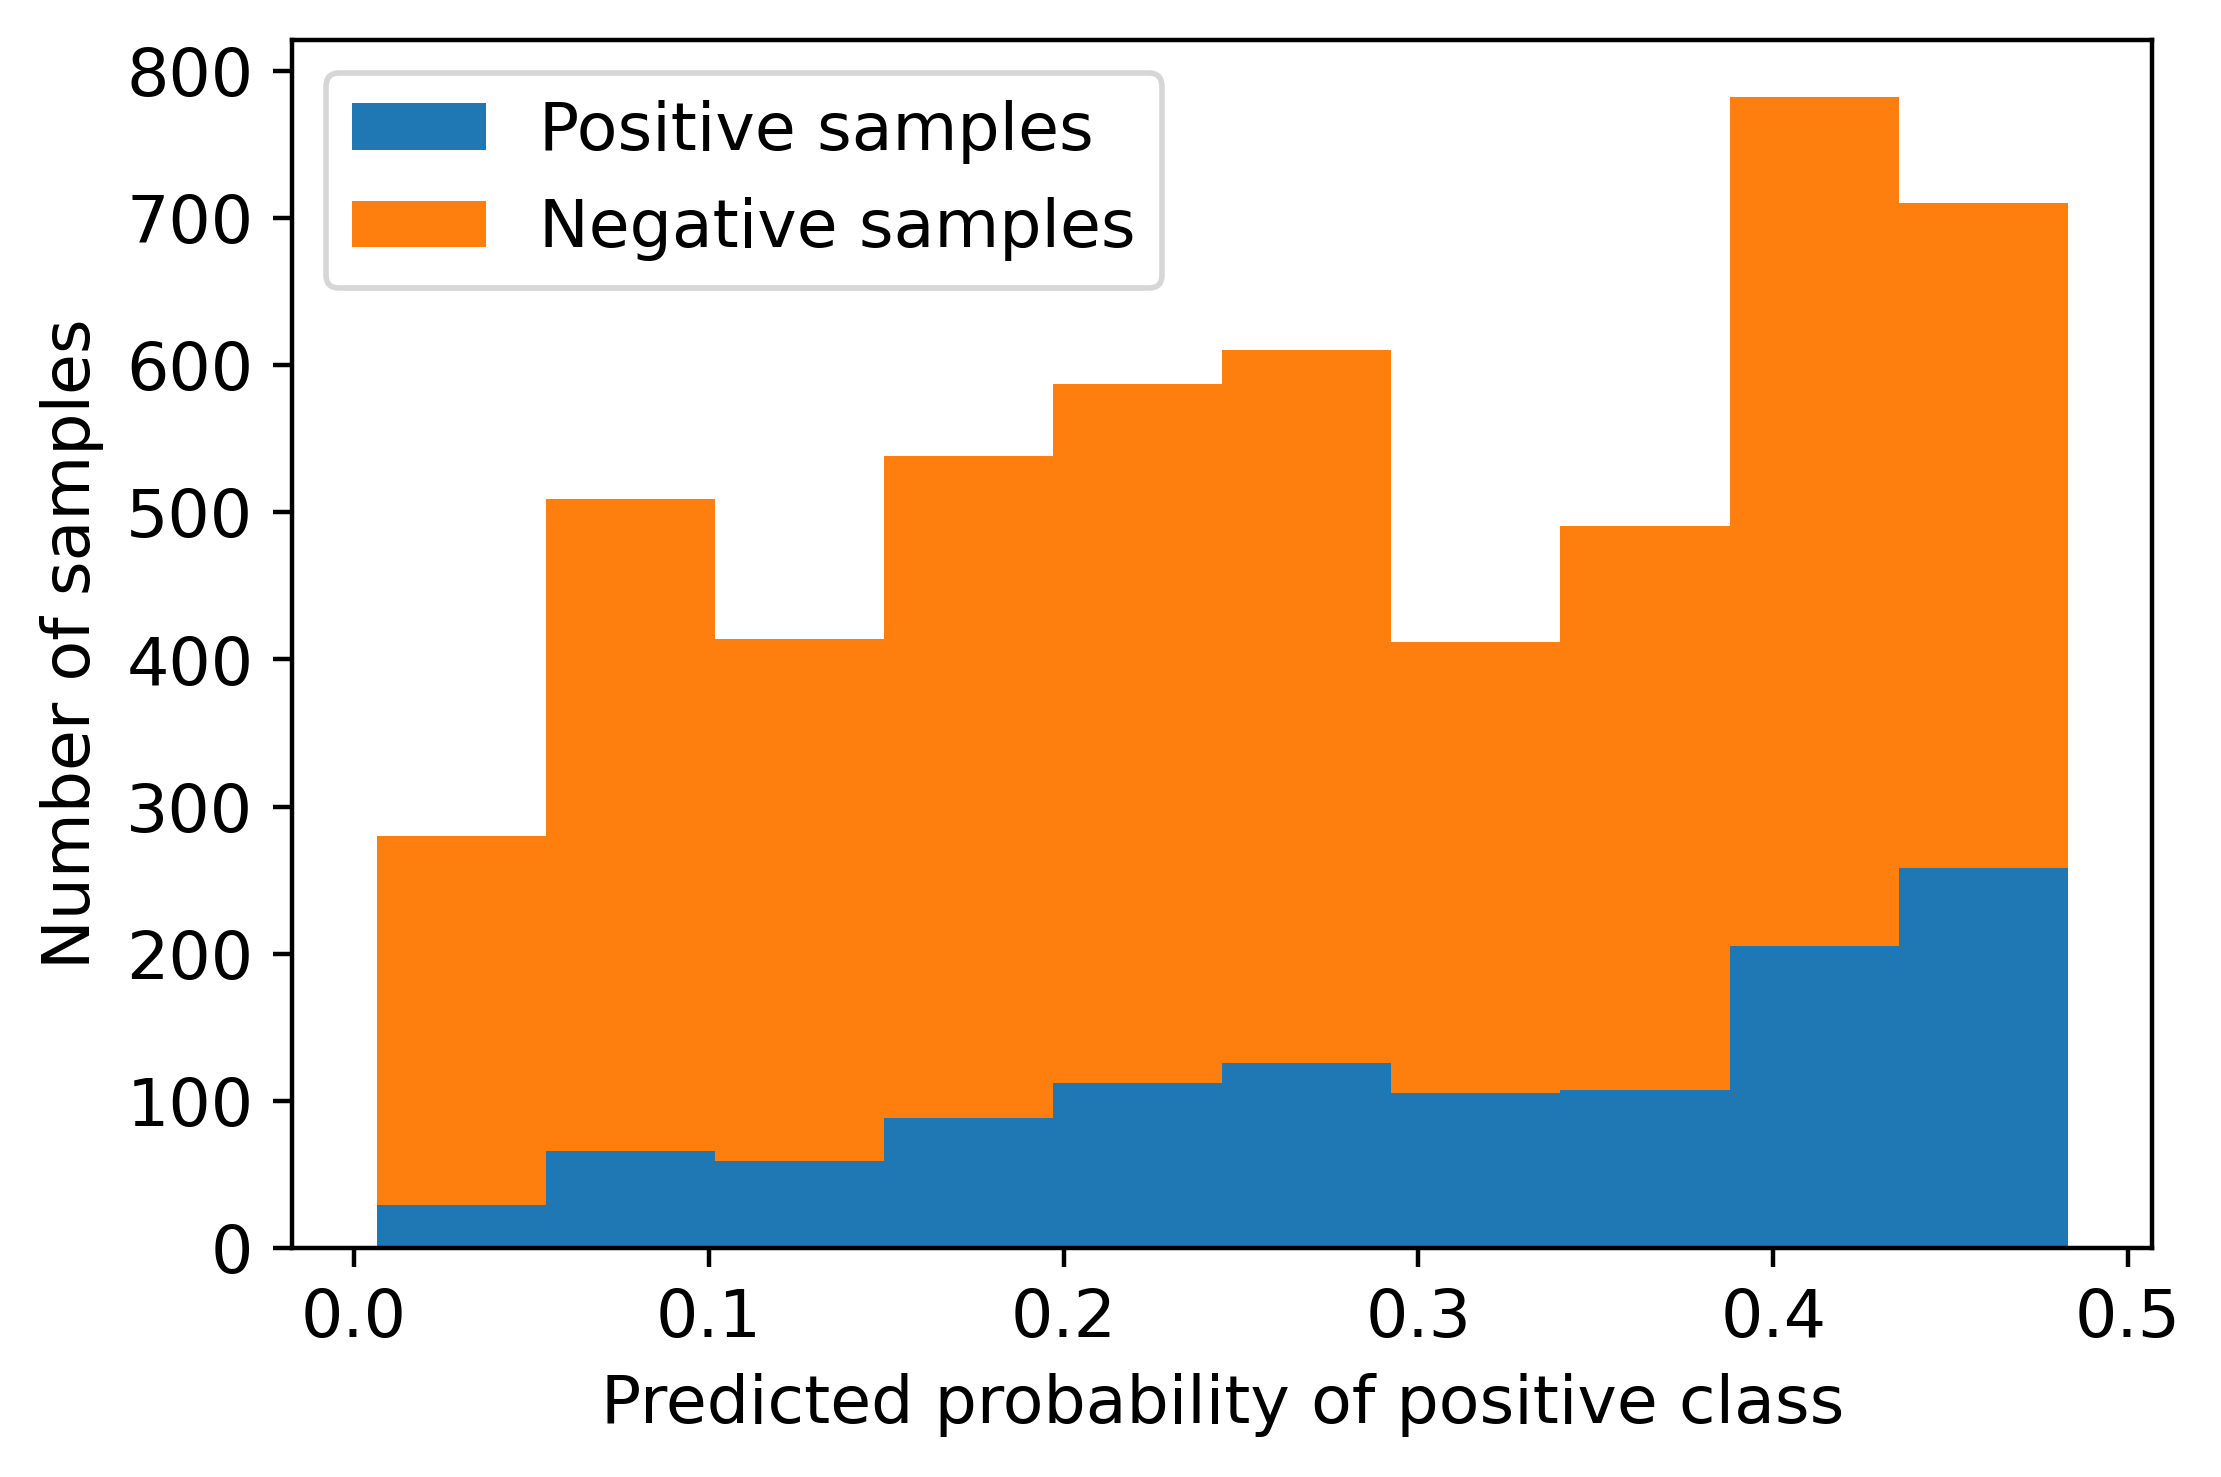

In [48]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_limitbal_test, pos_proba)
thresholds

array([1.48298463, 0.48298463, 0.46600863, 0.449111  , 0.43233001,
       0.4157029 , 0.39926548, 0.38305193, 0.36709445, 0.35142307,
       0.33606547, 0.3210468 , 0.30638957, 0.29211361, 0.27823599,
       0.26477108, 0.25173051, 0.23912333, 0.22695604, 0.21523272,
       0.2039552 , 0.19312317, 0.18273437, 0.17278475, 0.16326864,
       0.15417895, 0.14550731, 0.13724426, 0.1293794 , 0.12190156,
       0.11479893, 0.10805921, 0.10166973, 0.09561755, 0.0898896 ,
       0.08447273, 0.07935382, 0.07451986, 0.069958  , 0.06565559,
       0.06160024, 0.0577799 , 0.0541828 , 0.05079757, 0.0476132 ,
       0.04461906, 0.04180494, 0.03916104, 0.03667794, 0.03434666,
       0.03215862, 0.03010561, 0.02817986, 0.02637394, 0.02468081,
       0.0230938 , 0.02021314, 0.01890784, 0.01654049, 0.01546861,
       0.01446517, 0.0103345 , 0.00844129, 0.00789006, 0.00644174])

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

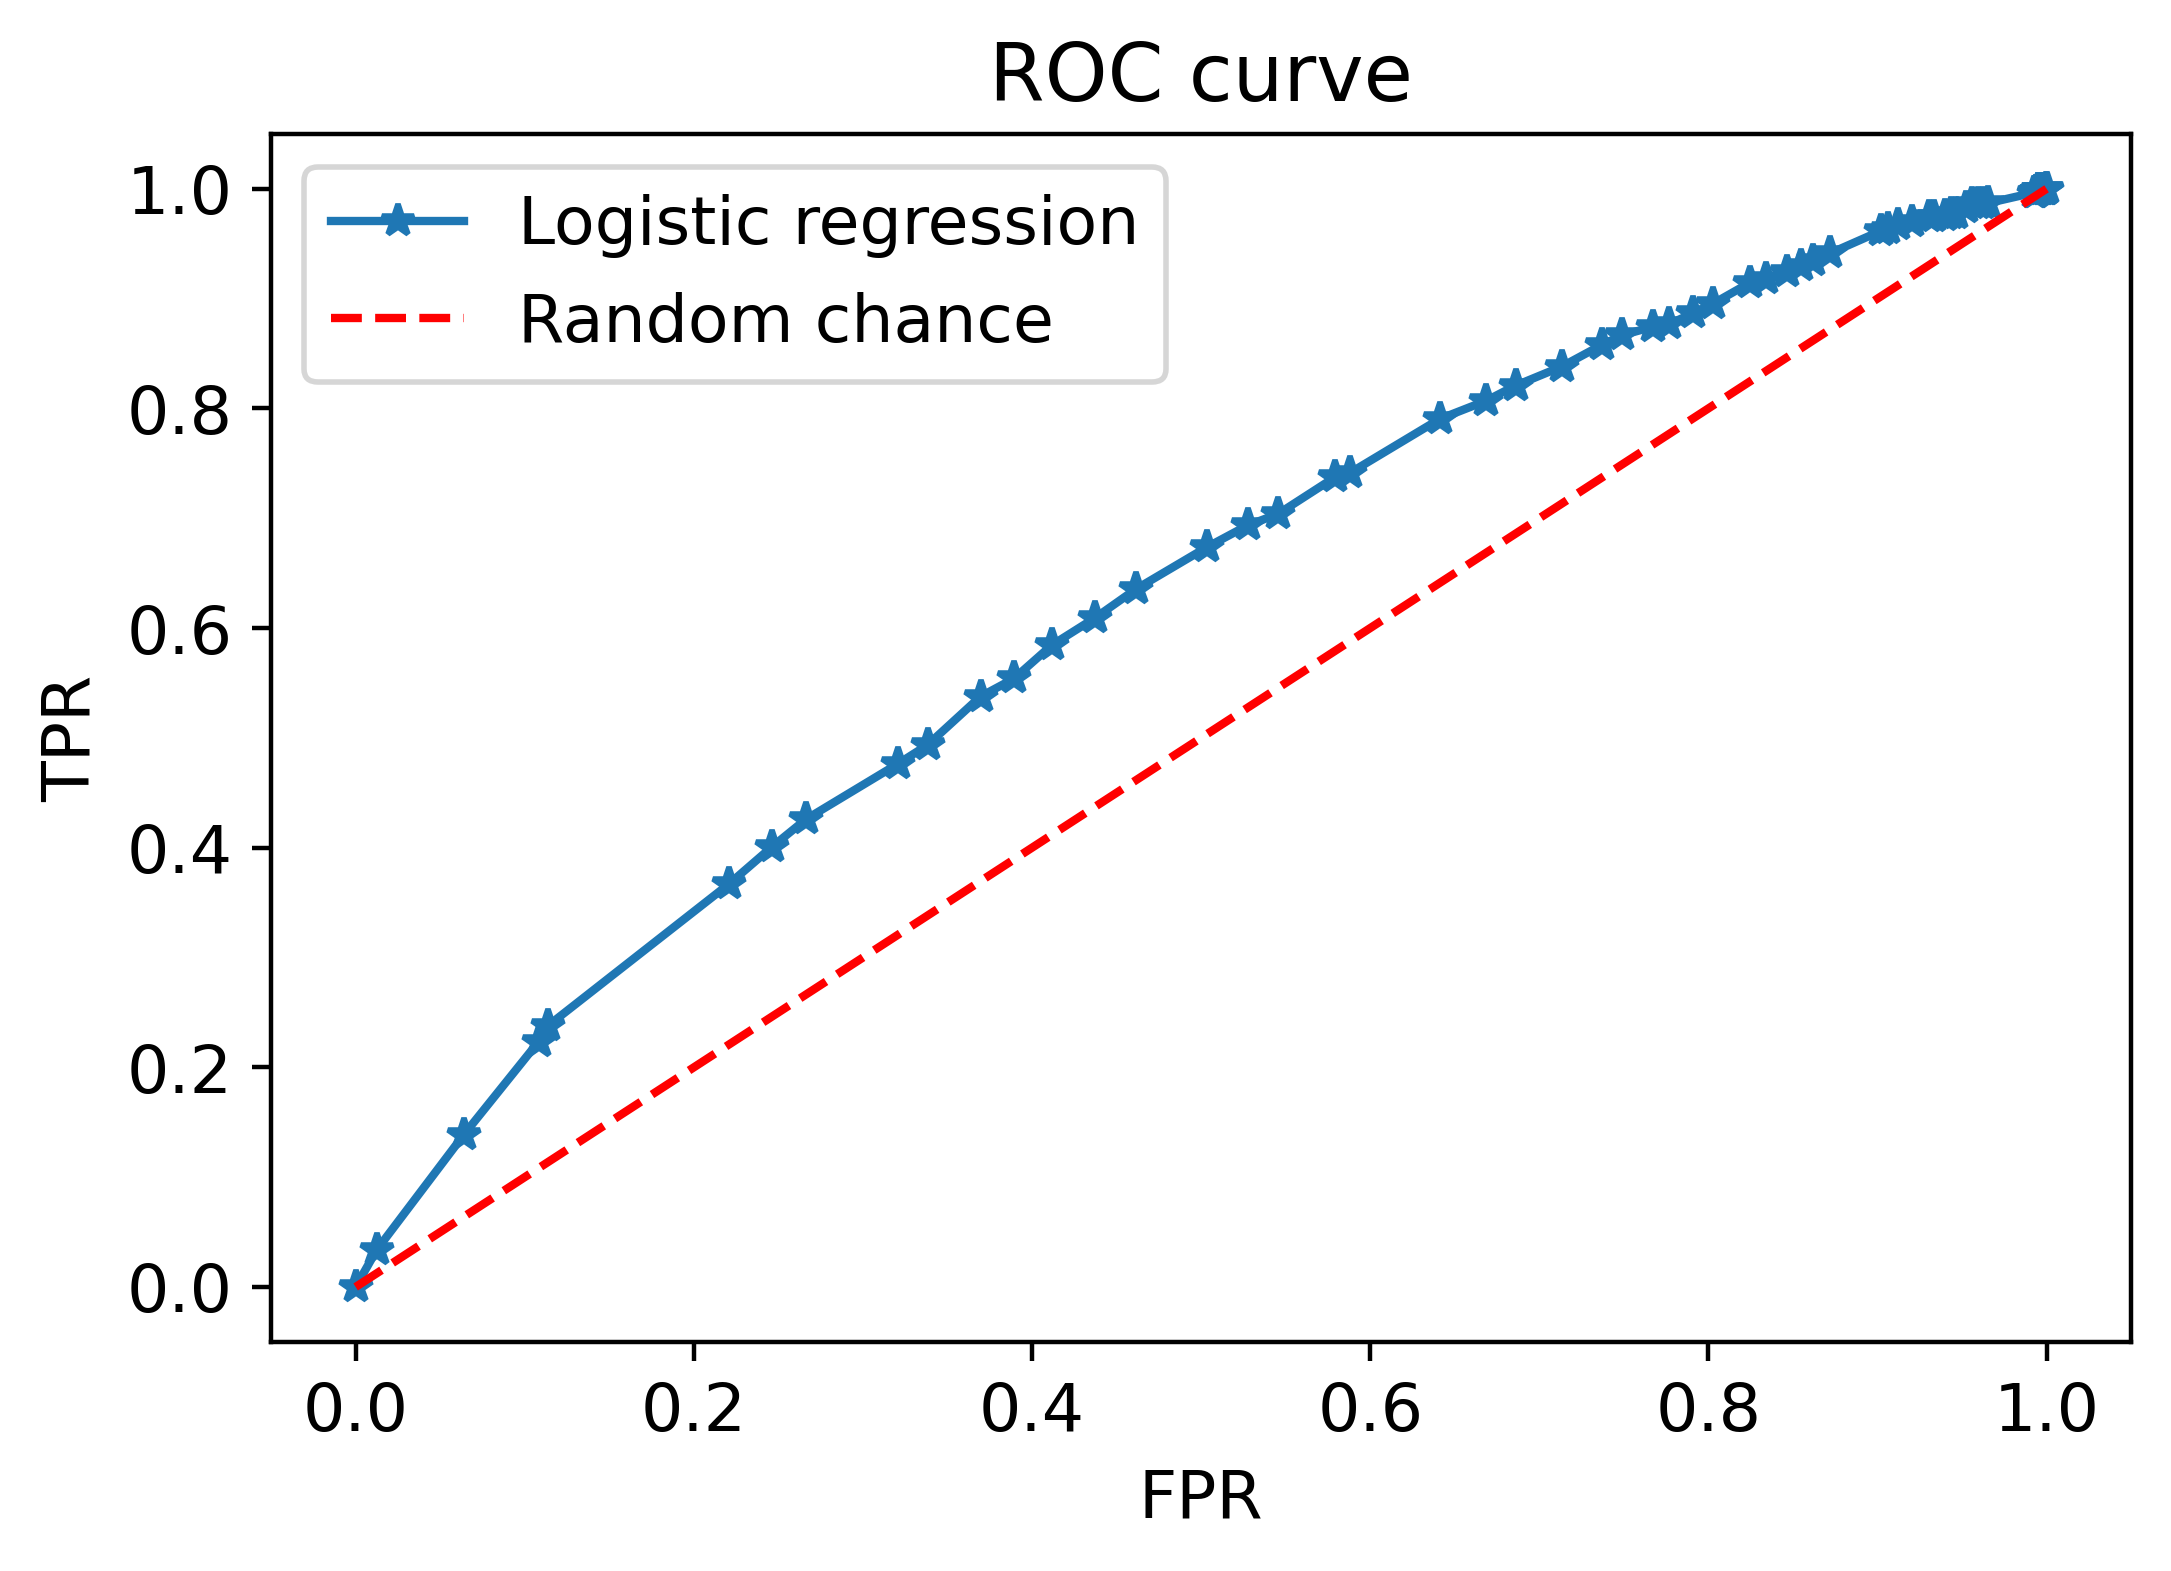

In [50]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_limitbal_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [52]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_limitbal_test, pos_proba)
thresholds

array([0.00789006, 0.00844129, 0.0103345 , 0.01264689, 0.01446517,
       0.01546861, 0.01654049, 0.01890784, 0.02021314, 0.02160657,
       0.0230938 , 0.02468081, 0.02637394, 0.02817986, 0.03010561,
       0.03215862, 0.03434666, 0.03667794, 0.03916104, 0.04180494,
       0.04461906, 0.0476132 , 0.05079757, 0.0541828 , 0.0577799 ,
       0.06160024, 0.06565559, 0.069958  , 0.07451986, 0.07935382,
       0.08447273, 0.0898896 , 0.09561755, 0.10166973, 0.10805921,
       0.11479893, 0.12190156, 0.1293794 , 0.13724426, 0.14550731,
       0.15417895, 0.16326864, 0.17278475, 0.18273437, 0.19312317,
       0.2039552 , 0.21523272, 0.22695604, 0.23912333, 0.25173051,
       0.26477108, 0.27823599, 0.29211361, 0.30638957, 0.3210468 ,
       0.33606547, 0.35142307, 0.36709445, 0.38305193, 0.39926548,
       0.4157029 , 0.43233001, 0.449111  , 0.46600863, 0.48298463])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision Recall curve')

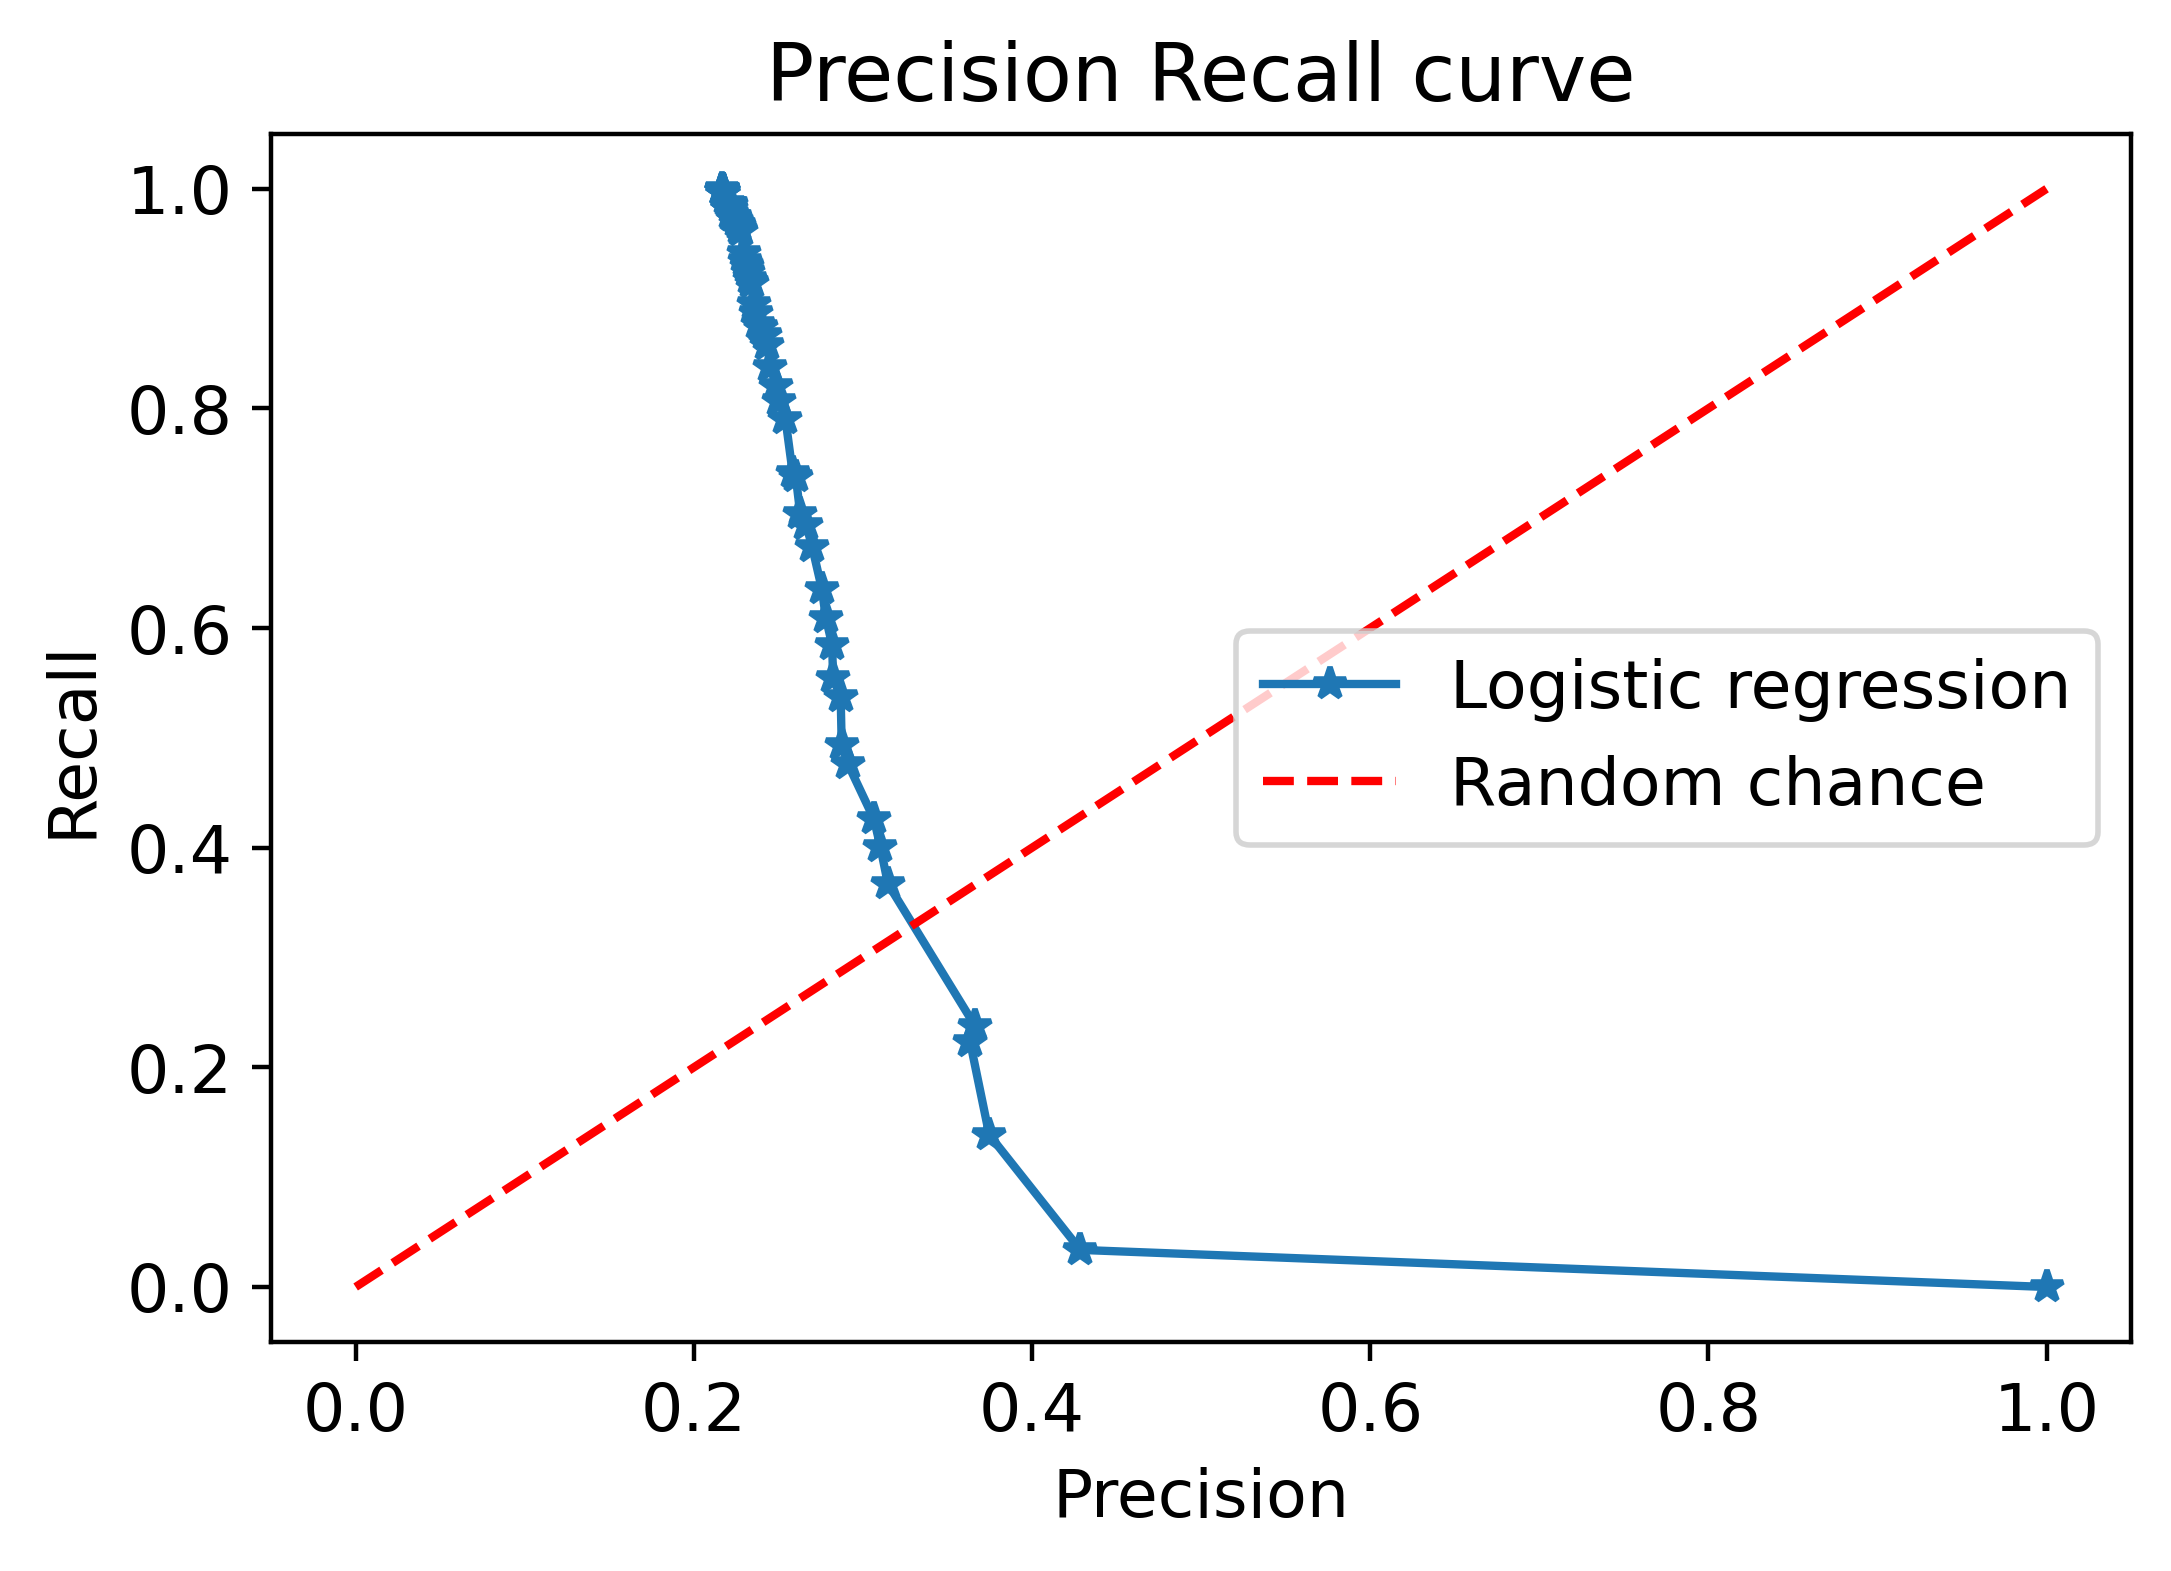

In [53]:
plt.plot(precision, recall, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [54]:
from sklearn.metrics import auc
area = auc(recall, precision)
area

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_limitbal_train, limit_bal_lr.predict_proba(X_limitbal_train)[:,1])
thresholds

array([1.48298463, 0.48298463, 0.4727918 , 0.46600863, 0.449111  ,
       0.43233001, 0.4157029 , 0.39926548, 0.38305193, 0.36709445,
       0.35142307, 0.33606547, 0.3210468 , 0.30638957, 0.29211361,
       0.27823599, 0.26477108, 0.25173051, 0.23912333, 0.22695604,
       0.21523272, 0.2039552 , 0.19312317, 0.18273437, 0.17278475,
       0.16326864, 0.15417895, 0.14550731, 0.13724426, 0.1293794 ,
       0.12190156, 0.11479893, 0.10805921, 0.10166973, 0.09699229,
       0.09561755, 0.0898896 , 0.08447273, 0.07935382, 0.07451986,
       0.069958  , 0.06565559, 0.06160024, 0.0577799 , 0.0541828 ,
       0.05079757, 0.0476132 , 0.04461906, 0.04180494, 0.03916104,
       0.03667794, 0.03434666, 0.03215862, 0.03010561, 0.02817986,
       0.02468081, 0.0230938 , 0.02160657, 0.02021314, 0.01890784,
       0.01768531, 0.01654049, 0.01546861, 0.01446517, 0.01352593,
       0.01264689, 0.0118243 , 0.01105461, 0.0103345 , 0.00966084,
       0.00903069, 0.00844129, 0.00789006, 0.00737455, 0.00689

Text(0.5, 1.0, 'ROC curve-Train set')

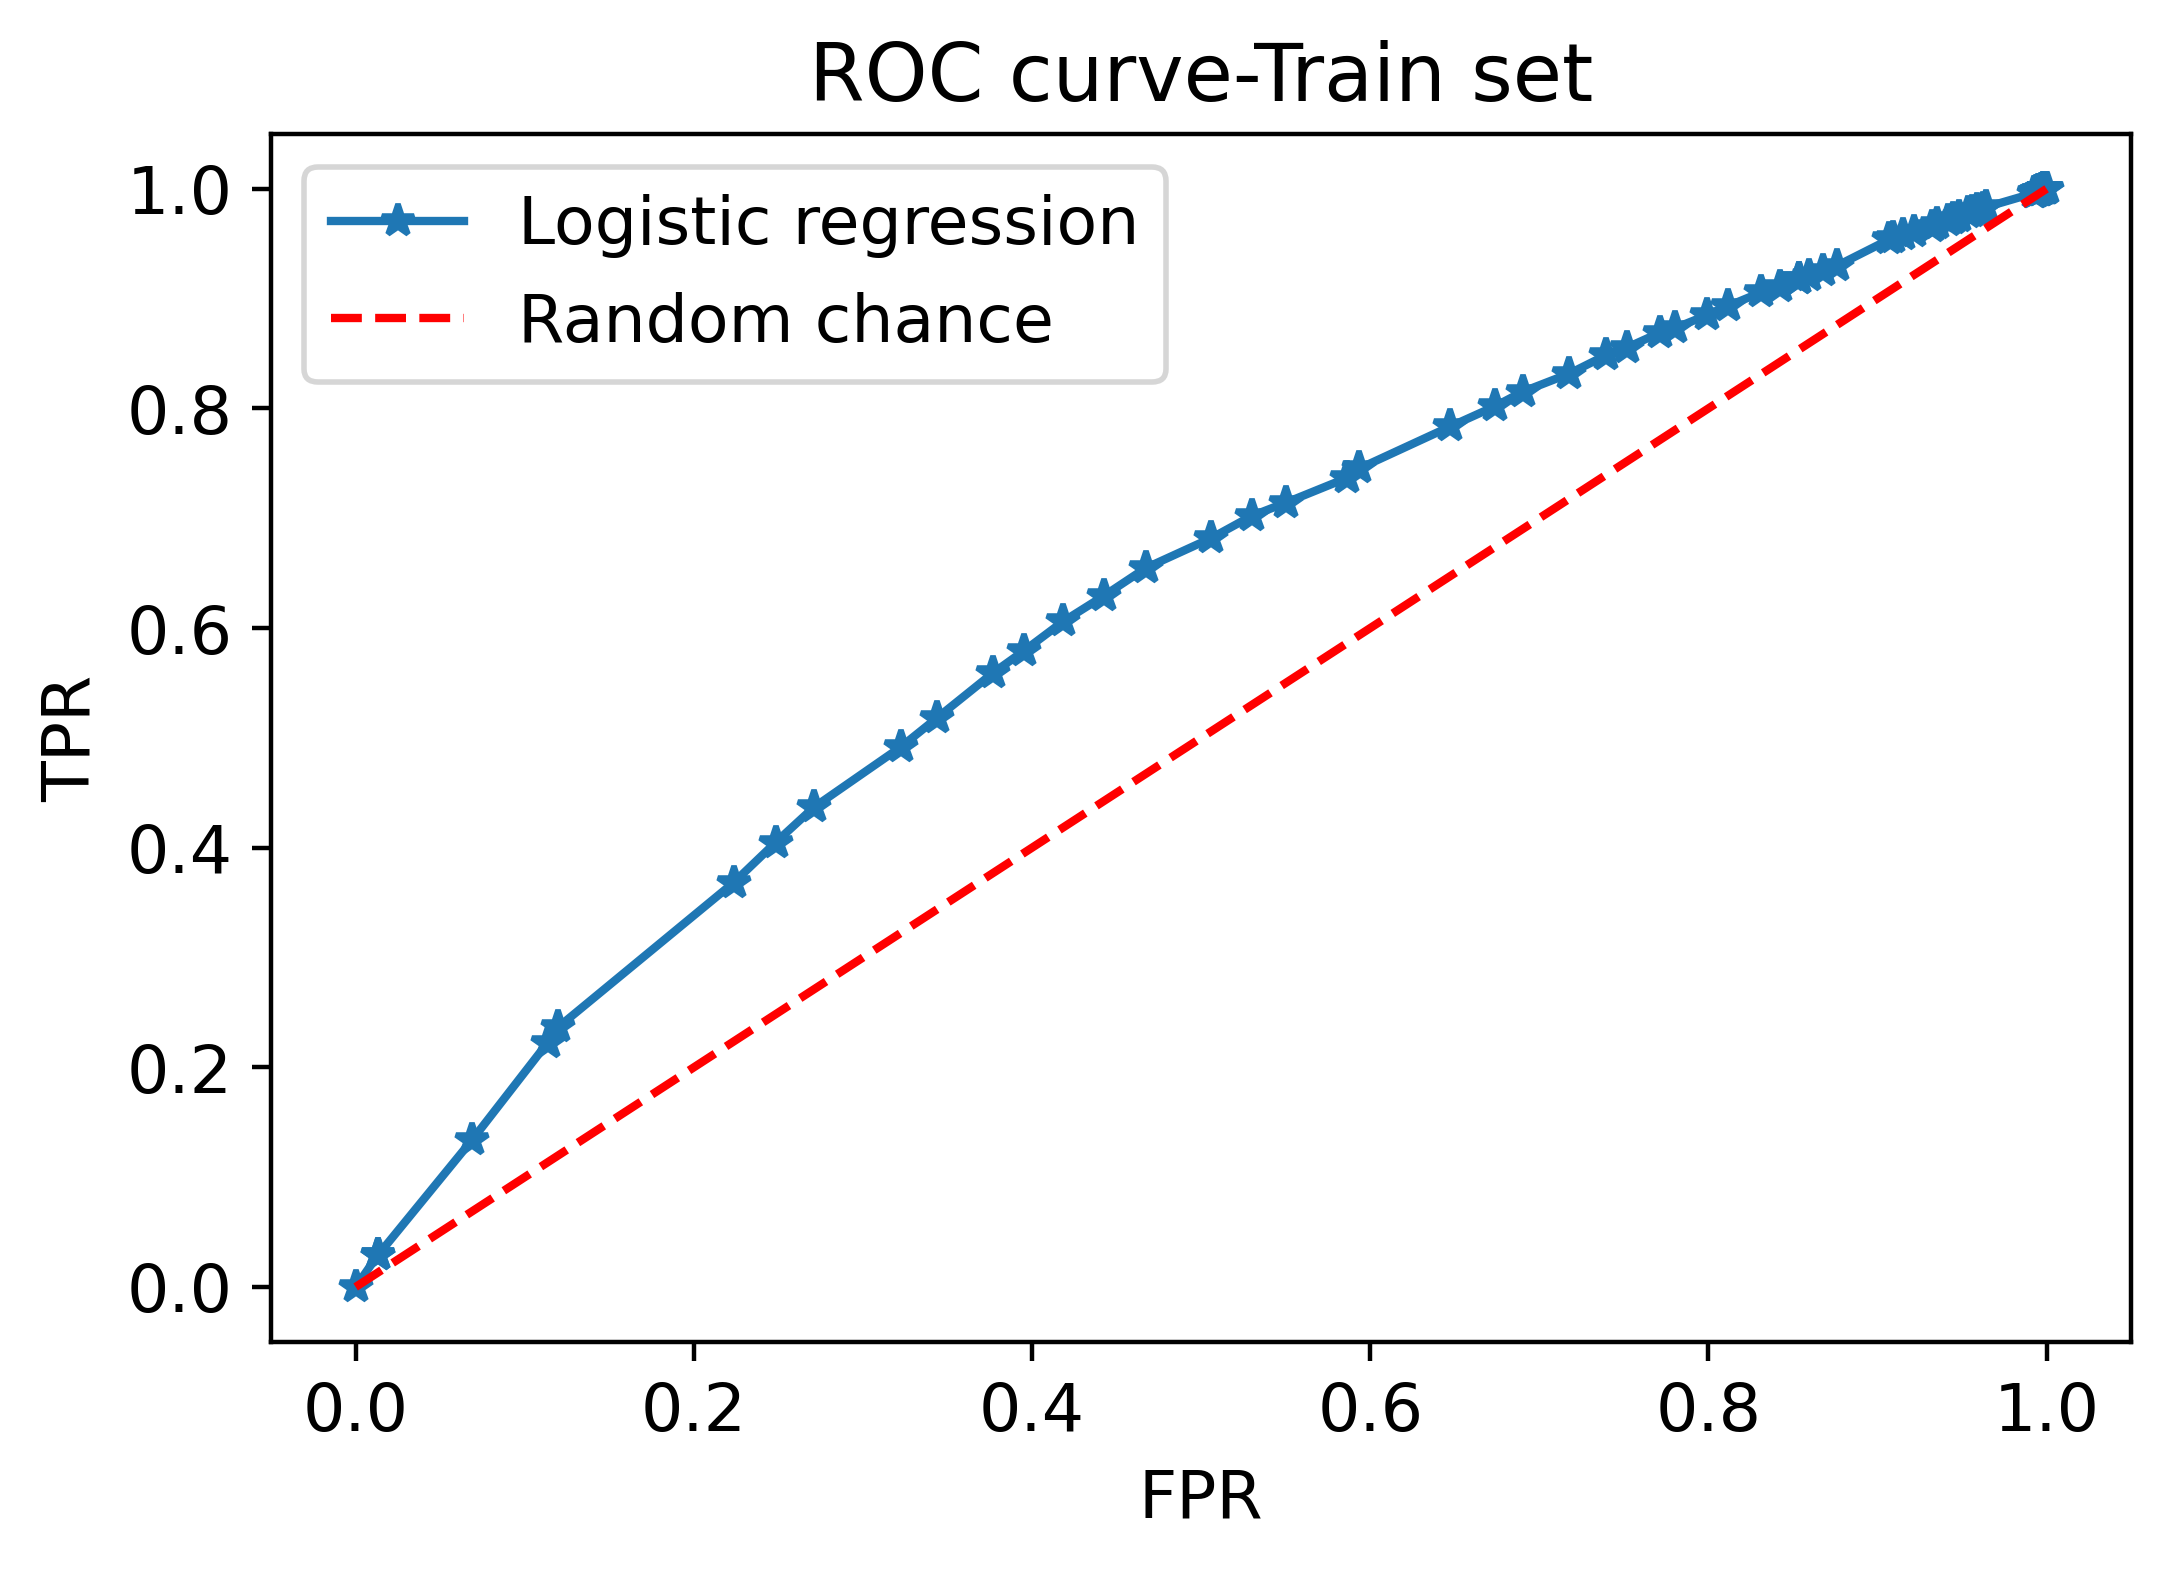

In [56]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve-Train set')

In [57]:
# The ROC AUC comes out to be same for train and test set.

    How is this different, conceptually and quantitatively, from your earlier calculation?
